<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [2]:
x_train.shape

(404, 13)

In [3]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [65]:
normalized_x_train[0]

array([0.0024119 , 0.        , 0.01592969, 0.        , 0.00105285,
       0.01201967, 0.17945359, 0.00778265, 0.00782786, 0.6007879 ,
       0.04109624, 0.77671895, 0.03663436])

In [35]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [53]:
normalized_x_train = preprocessing.normalize(x_train)

In [54]:
normalized_x_test = preprocessing.normalize(x_test)

In [5]:
#normalize the data
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Scale training and test data
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [5]:
#import model and layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:
model = Sequential()

model.add(Dense(6, input_dim=13, activation='relu'))

model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='relu'))

model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mse','mae'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 7         
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(x_train, y_train, epochs=500, verbose=False) # What parameters can I specify here?

In [51]:
scores = model.evaluate(x_test,y_test)

102/102 [==============================] - 0s 673us/sample - loss: 27.2330 - mse: 27.2330 - mae: 3.1967


In [52]:
print(f"{model.metrics_names[1]}: {scores[1]*100}")

mse: 2723.2973098754883


In [53]:
print(f"{model.metrics_names[2]}: {scores[2]*100}")

mae: 319.66612339019775


In [47]:
import matplotlib.pyplot as plt

In [57]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae'])

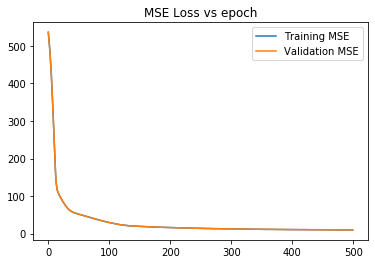

In [59]:
#visual

y = history.history['loss']
x = range(len(y))
plt.plot(x, y, label='Training MSE')

y = history.history['mse']
plt.plot(x, y, label='Validation MSE')


plt.legend(loc='upper right')

plt.title("MSE Loss vs epoch")
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
classic = LinearRegression()

In [17]:
classic.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
print("Linear Regression Training MSE: ", mean_squared_error(classic.predict(x_train), y_train))
print("Neural Network Training MSE: ", mean_squared_error(model.predict(x_train), y_train))
print("Linear Regression Test MSE: ", mean_squared_error(classic.predict(x_test), y_test))
print("Neural Network Test MSE: ", mean_squared_error(model.predict(x_test), y_test))

Linear Regression Training MSE:  22.00480083834814
Neural Network Training MSE:  11.544900647657686
Linear Regression Test MSE:  23.19559925642293
Neural Network Test MSE:  32.78364676674503


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [74]:
##### Your Code Here #####
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [61]:
### Let's do it!

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Stretch - use dropout 
import numpy as np

In [67]:
# Hyper Parameters
batch_size = 64
num_classes = 10
epochs = 20

In [75]:
x_train[0].shape

(28, 28)

In [76]:
x_train.shape

(60000, 28, 28)

In [79]:
x_test.shape

(10000, 28, 28)

In [64]:
# Reshape the data
x_train = x_train.reshape(60000, 784) #784 = img_row x img_cols
x_test = x_test.reshape(10000, 784)

In [65]:
# X Variable Types
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [68]:
# Correct Encoding on Y
# What softmax expects = [0,0,0,0,0,1,0,0,0,0]

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [69]:
mnist_model = Sequential()

# Input => Hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Output
mnist_model.add(Dense(10,activation='softmax'))

#Compile
mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

mnist_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_29 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_30 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = mnist_model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=False)
scores = mnist_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.4360 - accuracy: 0.8605


In [72]:
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

accuracy: 86.04999780654907


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.